In [43]:
import numpy as np
import pathlib
from oniakIO import odats
import os

root_path = pathlib.Path(os.getcwd()).parent

dirpath = root_path / "result/dpl1"
exp_list = os.listdir(str(dirpath)) 
calc_results = np.empty((len(exp_list), 100, 100))
cnt = 0
for fid, filename in enumerate(exp_list):
    if "sj" not in filename:
        continue
    full_name = str(dirpath / filename)
    data = odats.read_file(full_name)
    if data.shape != (100, 100):
        continue
    calc_results[cnt] = data
    cnt += 1
calc_results = calc_results[:cnt]
cnt

10000

In [25]:
import numpy as np
import pathlib
from oniakIO import odats
import os

root_path = pathlib.Path(os.getcwd()).parent

dirpath = root_path / "result/dpl1"
exp_list = os.listdir(str(dirpath)) 
calc_results = np.empty((len(exp_list), 100, 100))
cnt = 0
for fid, filename in enumerate(exp_list):
    if "sj" in filename:
        continue
    full_name = str(dirpath / filename)
    data = odats.read_file(full_name)
    if data.shape != (100, 100):
        continue
    calc_results[cnt] = data
    cnt += 1
calc_results = calc_results[:cnt]
cnt

9999

In [51]:
import numpy as np

dirpath = root_path / "result/distance_preserve"
exp_list = os.listdir(str(dirpath))
calc_results2 = np.empty((len(exp_list), 100, 100))
for fid, filename in enumerate(exp_list):
    full_name = str(dirpath / filename)
    data = odats.read_file(full_name)
    calc_results2[fid] = data
calc_results2[:, 0, 0], len(calc_results2)

(array([  2256.17333984, 156491.5       , 149897.625     , ...,
        121495.0078125 , 151300.625     , 110172.3203125 ]),
 10001)

In [6]:
from oniakIO import odats
import pathlib, os

gt_dist = odats.read_file(str(root_path / "result/distance_preserve/gnd.odat"))
sj_results = calc_results / gt_dist[np.newaxis, :, :]
jl_results = calc_results2 / gt_dist[np.newaxis, :, :]

In [19]:
from oniakExp import stats
nbins = 2001
num_setting = 10000
dist_far = 1000
xs = np.linspace(0, dist_far, nbins)

def rank_cdfs(data):
    cdfs = np.empty((num_setting, nbins))
    for i in range(num_setting):
        x = i // 100
        y = i % 100
        cdfs[i] = stats.cdf(data[:, x, y], limits=[0, dist_far], nbins=nbins)
    return cdfs[cdfs[:,150].argsort()]

In [52]:
jl_results = calc_results2 / gt_dist[np.newaxis, :, :]
jl_cdf = rank_cdfs(jl_results)

In [49]:
sj_results = calc_results / gt_dist[np.newaxis, :, :]
sj_cdf = rank_cdfs(sj_results)

In [26]:
l1_results = calc_results / gt_dist[np.newaxis, :, :]
l1_cdf = rank_cdfs(l1_results)

In [46]:
from scipy.stats import binom
binom_cdf = lambda x: 1 - binom.cdf(3, 9, x)

def distance_pres(cdf, near, far, recall=0.9):
    near_data = binom_cdf(cdf[near])
    if far == "avg":
        far_data = np.mean(cdf, axis=0)
    else:
        far_data = cdf[far]
    idx = np.searchsorted(near_data, recall)
    print(xs[idx])
    fp = binom_cdf(far_data[5:idx])
    x_ratio = []
    for i in range(5, idx):
        x_ratio.append(xs[idx] / xs[i])
    return x_ratio, fp


85.0
37.5


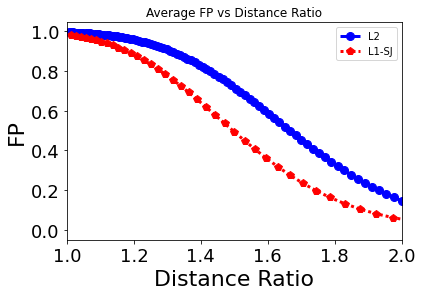

In [63]:
from oniakPlot import line_plot

near = 1000
far = "avg"

line_plot.plot_result([distance_pres(jl_cdf, near, far), distance_pres(sj_cdf, near, far)],
         line_names=["L2", "L1-SJ"], xlabel="Distance Ratio", ylabel="FP", legend_pos="best", limx=[1, 2],
                      figtitle="Average FP vs Distance Ratio", savepath="/media/mydrive_2/Dropbox (GaTech)/lpsubspace/figs/{}_{}_ratio.pdf".format(near, far))

65.0
32.0
337.0


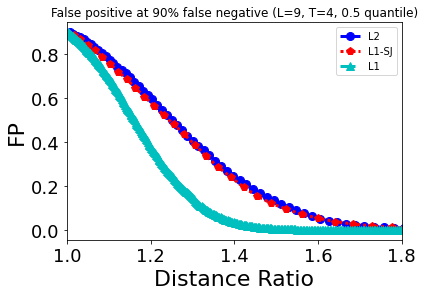

In [59]:
near = 5000
far = 5000

line_plot.plot_result([distance_pres(jl_cdf, near, far), distance_pres(sj_cdf, near, far), distance_pres(l1_cdf, near, far)],
         line_names=["L2", "L1-SJ", "L1"], xlabel="Distance Ratio", ylabel="FP", legend_pos="best", limx=[1, 1.8],
                      figtitle="False positive at 90% false negative (L=9, T=4, 0.5 quantile)", savepath="/media/mydrive_2/Dropbox (GaTech)/lpsubspace/figs/{}_{}_ratio.pdf".format(near, far))